In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#results_folder = '../results/firing_rates_10/'
#results_folder = '../results/firing_rates_4/'
results_folder = '../results/firing_rates_3/'

In [3]:
region_subset = 3

In [4]:
num_variables = int(results_folder.split("/")[-2].split("_")[-1])
if num_variables == 10:
    num_variables = ""
    region_subset = ""
    #regions = ["dmn", "random", "visual", "4Ldmn"]
    regions = ["dmn", "random", "visual"]
else:
    regions = ["dmn", "random", "visual", "L"]

In [5]:
kraskov = {}
copulas = {}
for region_result in os.listdir(results_folder):
    print(region_result)
    results_path = os.path.join(results_folder, region_result, "100000")
    try:
        TC_filename = os.path.join(results_path, "tc_samples.txt")
        DTC_filename = os.path.join(results_path, "dtc_samples.txt")
        TC_matrix = np.loadtxt(TC_filename, delimiter=",")
        DTC_matrix = np.loadtxt(DTC_filename, delimiter=",")
    except:
        TC_filename = os.path.join(results_path, "tc_samples.npy")
        DTC_filename = os.path.join(results_path, "dtc_samples.npy")
        TC_matrix = np.load(TC_filename)
        DTC_matrix = np.load(DTC_filename)
    TC_list, TC_std = TC_matrix.mean(axis=0), TC_matrix.std(axis=0)
    DTC_list, DTC_std = DTC_matrix.mean(axis=0), DTC_matrix.std(axis=0)
    if "kraskov" in region_result:
        kraskov[region_result] = {}
        kraskov[region_result]["TC_list"] = TC_list
        kraskov[region_result]["TC_std"] = TC_std
        kraskov[region_result]["DTC_list"] = DTC_list
        kraskov[region_result]["DTC_std"] = DTC_std
    if "copulas" in region_result:
        copulas[region_result] = {}
        copulas[region_result]["TC_list"] = TC_list
        copulas[region_result]["TC_std"] = TC_std
        copulas[region_result]["DTC_list"] = DTC_list
        copulas[region_result]["DTC_std"] = DTC_std

kraskov_3visual2_drug
copulas_3L2
copulas_3random1
kraskov_3dmn2
copulas_3visual3_drug
kraskov_3visual3
copulas_3L3
kraskov_3random1
copulas_3visual1
kraskov_3dmn1_drug
copulas_3L2_drug
kraskov_3visual2
kraskov_3random3_drug
copulas_3dmn2
kraskov_3dmn3
copulas_3dmn3_drug
kraskov_3random3
copulas_3visual3
copulas_3random3_drug
copulas_3visual1_drug
copulas_3L1
kraskov_3L3_drug
kraskov_3L3
copulas_3random1_drug
kraskov_3random2_drug
kraskov_3random1_drug
kraskov_3visual1
kraskov_3L2_drug
copulas_3dmn1
copulas_3dmn3
copulas_3dmn2_drug
copulas_3visual2_drug
copulas_3dmn1_drug
copulas_3random3
kraskov_3L2
copulas_3L3_drug
kraskov_3dmn1
kraskov_3random2
copulas_3visual2
kraskov_3visual1_drug
copulas_3L1_drug
copulas_3random2
kraskov_3dmn2_drug
kraskov_3visual3_drug
kraskov_3dmn3_drug
copulas_3random2_drug
kraskov_3L1_drug
kraskov_3L1


In [6]:
def barPosition(var, n_vars):
    separation =1
    width=0.8
    if n_vars%2==0:
        return ((var-n_vars/2)/n_vars)*width*separation
    else:
        return ((var-n_vars/2)/n_vars)*width*separation-width/(2*n_vars)

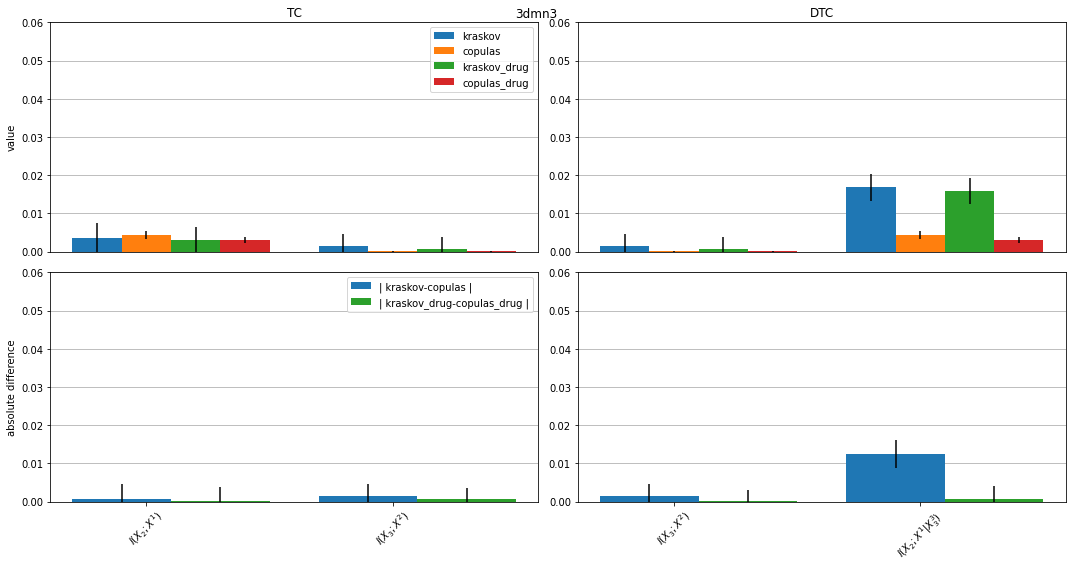

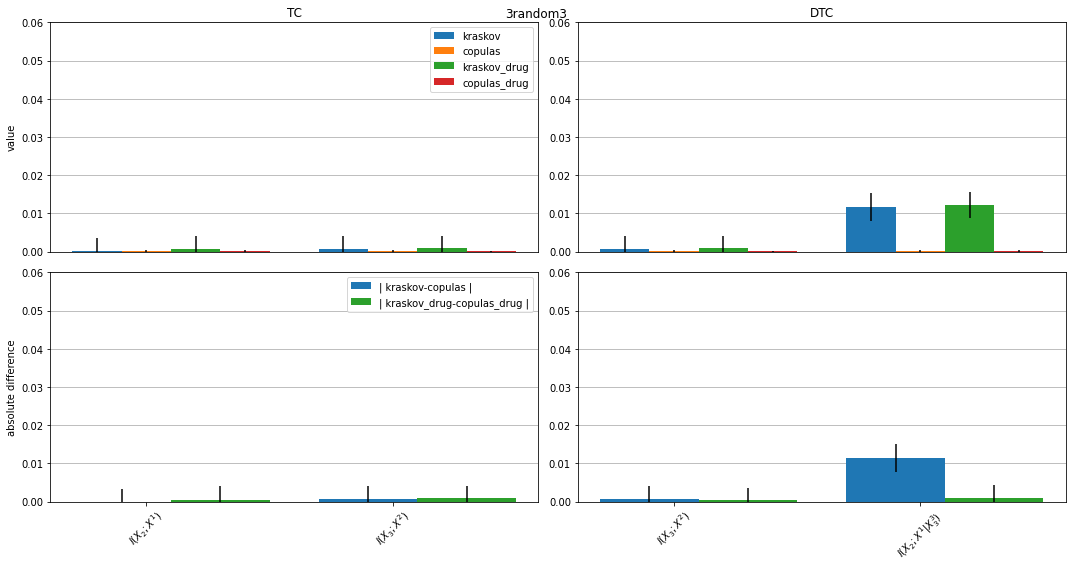

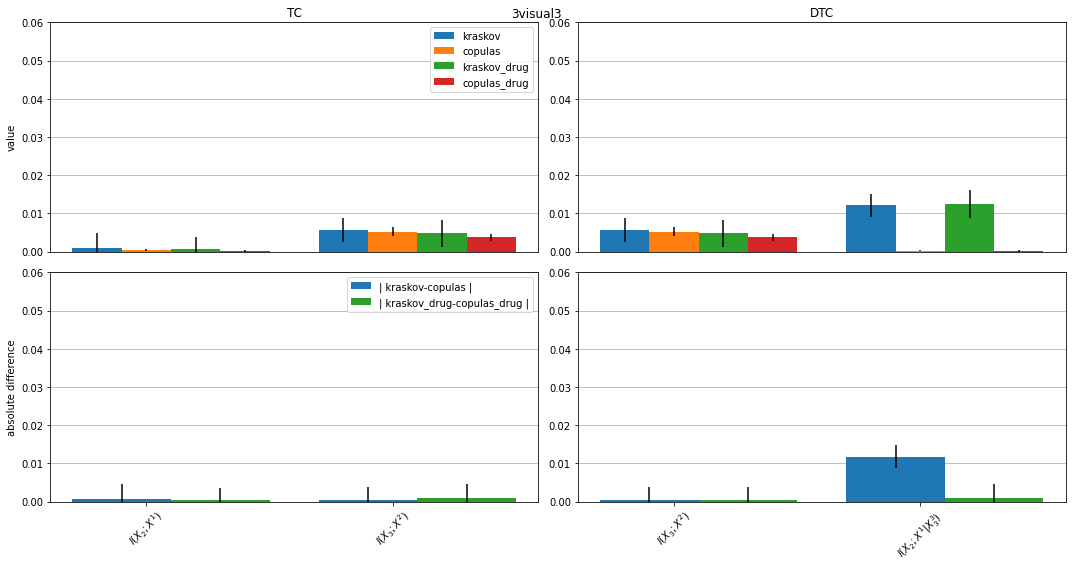

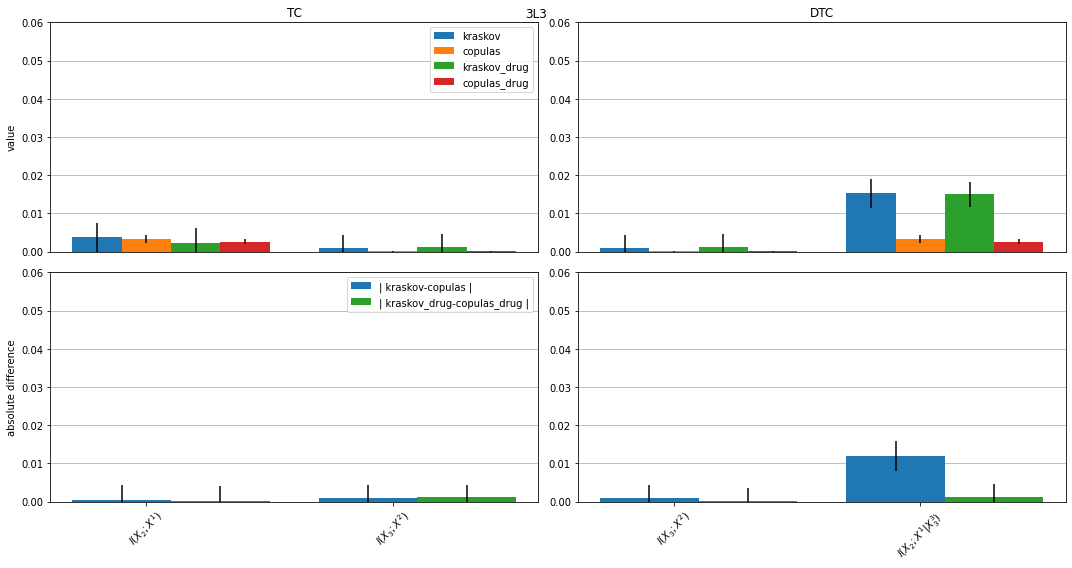

In [7]:
barwidth = 0.8/4
for i, region in enumerate(regions):
    # Retrieve Data
    try:
        kraskov_data = kraskov[f"kraskov_{num_variables}{region}{region_subset}"]
        kraskov_drug_data = kraskov[f"kraskov_{num_variables}{region}{region_subset}_drug"]
        copulas_data = copulas[f"copulas_{num_variables}{region}{region_subset}"]
        copulas_drug_data = copulas[f"copulas_{num_variables}{region}{region_subset}_drug"]

        # Kraskov TC/DTC
        kraskov_TC, kraskov_DTC = kraskov_data["TC_list"], kraskov_data["DTC_list"]
        kraskov_TC_std, kraskov_DTC_std = kraskov_data["TC_std"], kraskov_data["DTC_std"]
        # Kraskov Drug TC/DTC
        kraskov_drug_TC, kraskov_drug_DTC = kraskov_drug_data["TC_list"], kraskov_drug_data["DTC_list"]
        kraskov_drug_TC_std, kraskov_drug_DTC_std = kraskov_drug_data["TC_std"], kraskov_drug_data["DTC_std"]
        # Copulas TC/DTC
        copulas_TC, copulas_DTC = copulas_data["TC_list"], copulas_data["DTC_list"]
        copulas_TC_std, copulas_DTC_std = copulas_data["TC_std"], copulas_data["DTC_std"]
        # Copulas Drug TC/DTC
        copulas_drug_TC, copulas_drug_DTC = copulas_drug_data["TC_list"], copulas_drug_data["DTC_list"]
        copulas_drug_TC_std, copulas_drug_DTC_std = copulas_drug_data["TC_std"], copulas_drug_data["DTC_std"]

        # Comparison TC/DTC
        TC_comp = abs(kraskov_TC - copulas_TC)
        DTC_comp = abs(kraskov_DTC - copulas_DTC)
        TC_comp_drug = abs(kraskov_drug_TC - copulas_drug_TC)
        DTC_comp_drug = abs(kraskov_drug_TC - copulas_drug_TC)

        # Figure
        fig, ax = plt.subplots(2, 2, figsize=(15,8))    

        # Real vs Methods
        # TC
        ax[0, 0].bar(np.arange(len(kraskov_TC))+barPosition(1, 4), kraskov_TC, yerr=kraskov_TC_std, width=barwidth, label="kraskov", zorder=3, color="C0")
        ax[0, 0].bar(np.arange(len(copulas_TC))+barPosition(2, 4), copulas_TC, yerr=copulas_TC_std, width=barwidth, label="copulas", zorder=3, color="C1")
        ax[0, 0].bar(np.arange(len(kraskov_drug_TC))+barPosition(3, 4), kraskov_drug_TC, yerr=kraskov_drug_TC_std, width=barwidth, label="kraskov_drug", zorder=3, color="C2")
        ax[0, 0].bar(np.arange(len(copulas_drug_TC))+barPosition(4, 4), copulas_drug_TC, yerr=copulas_drug_TC_std, width=barwidth, label="copulas_drug", zorder=3, color="C3")
        ax[0, 0].grid(axis='y')
        ax[0, 0].legend()
        ax[0, 0].set_xticks([])
        ax[0, 0].set_ylabel("value")
        ax[0, 0].set_title("TC")
        ax[0, 0].set_ylim([0, 0.06])
        # DTC
        ax[0, 1].bar(np.arange(len(kraskov_DTC))+barPosition(1, 4), kraskov_DTC, yerr=kraskov_DTC_std, width=barwidth, label="kraskov", zorder=3)
        ax[0, 1].bar(np.arange(len(copulas_DTC))+barPosition(2, 4), copulas_DTC, yerr=copulas_DTC_std, width=barwidth, label="copulas", zorder=3)
        ax[0, 1].bar(np.arange(len(kraskov_drug_DTC))+barPosition(3, 4), kraskov_drug_DTC, yerr=kraskov_drug_DTC_std, width=barwidth, label="kraskov_drug", zorder=3)
        ax[0, 1].bar(np.arange(len(copulas_drug_DTC))+barPosition(4, 4), copulas_drug_DTC, yerr=copulas_drug_DTC_std, width=barwidth, label="copulas_drug", zorder=3)
        ax[0, 1].grid(axis='y')
        #ax[0, 1].legend()
        ax[0, 1].set_xticks([])
        ax[0, 1].set_title("DTC")
        ax[0, 1].set_ylim([0, 0.06])

        # Absolute difference vs methods
        # TC
        TC_labels = [r"$I(X_{}; X^{})$".format('{'+str(i+2)+'}','{'+str(i+1)+'}') for i in range(len(kraskov_TC))]
        ax[1, 0].bar(np.arange(len(TC_labels))+barPosition(1, 2), TC_comp, yerr=np.sqrt((kraskov_TC_std)**2 + (copulas_TC_std)**2), width=0.4, zorder=3, label="| kraskov-copulas |", color="C0")
        ax[1, 0].bar(np.arange(len(TC_labels))+barPosition(2, 2), TC_comp_drug, yerr=np.sqrt((kraskov_drug_TC_std)**2 + (copulas_drug_TC_std)**2), width=0.4, zorder=3, label="| kraskov_drug-copulas_drug |", color="C2")
        ax[1, 0].grid(axis='y')
        ax[1, 0].set_xticks(np.arange(len(TC_labels))+0.1)
        ax[1, 0].set_xticklabels(TC_labels, rotation=45)
        ax[1, 0].set_ylabel("absolute difference")
        ax[1, 0].legend()
        ax[1, 0].set_ylim([0, 0.06])

        # DTC
        DTC_labels =[r"$I(X_{}; X^{})$".format('{'+str(len(kraskov_TC)+1)+'}','{'+str(len(kraskov_TC))+'}')] + [r'$I(X_{}; X^{}|X^{}_{})$'.format('{'+str(i+2)+'}', i+1 ,'{'+str(len(kraskov_DTC)+1)+'}', '{'+str(i+3)+'}') for i in range(len(kraskov_DTC)-1)] 
        ax[1, 1].bar(np.arange(len(DTC_labels))+barPosition(1, 2), DTC_comp, yerr=np.sqrt((kraskov_DTC_std)**2 + (copulas_DTC_std)**2), width=0.4, zorder=3, label="| kraskov-copulas |", color="C0")
        ax[1, 1].bar(np.arange(len(DTC_labels))+barPosition(2, 2), DTC_comp_drug, yerr=np.sqrt((kraskov_drug_DTC_std)**2 + (copulas_drug_DTC_std)**2), width=0.4, zorder=3, label="| kraskov_drug-copulas_drug |", color="C2")
        ax[1, 1].grid(axis='y')
        ax[1, 1].set_xticks(np.arange(len(DTC_labels))+0.1)
        ax[1, 1].set_xticklabels(DTC_labels, rotation=45)
        #ax[1, 1].legend()
        ax[1, 1].set_ylim([0, 0.06])

        plt.suptitle(f"{num_variables}{region}{region_subset}")

        plt.tight_layout()
        plt.show()
        fig.savefig(f'../results/plots/bars/{region}.pdf', dpi=500)
    except:
        print("An Exception")
        pass

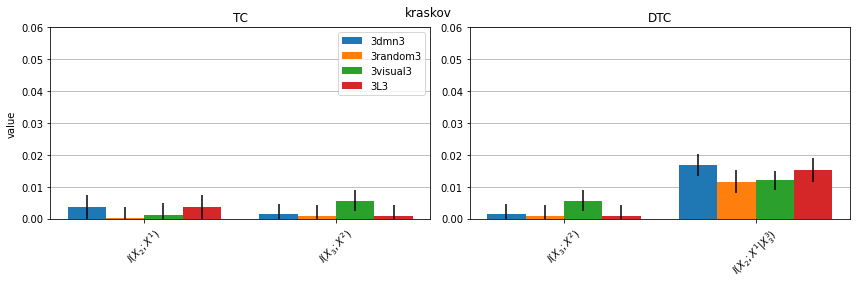

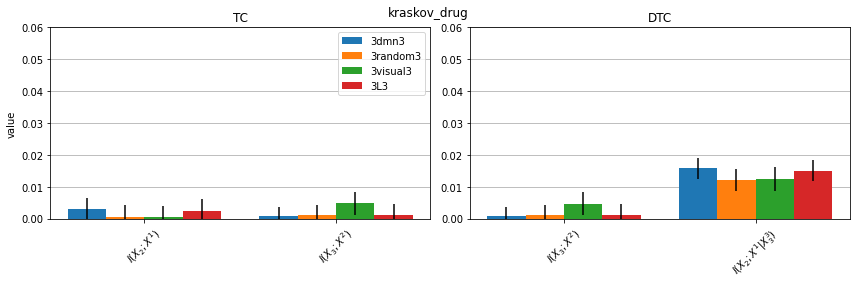

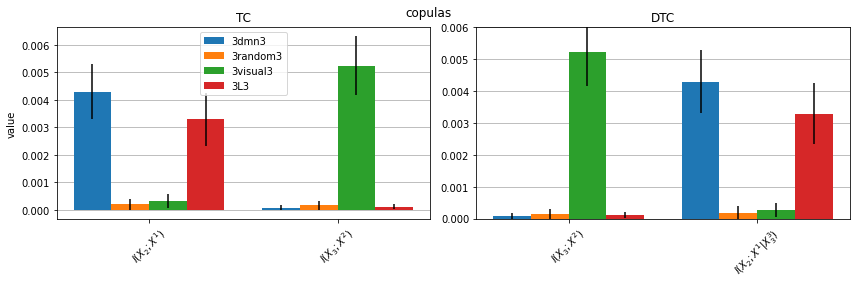

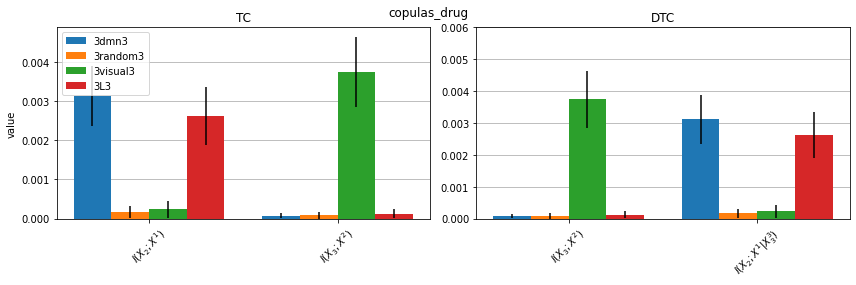

In [8]:
barwidth = 0.8/4

for i, method in enumerate(["kraskov", "kraskov_drug", "copulas", "copulas_drug"]):
    method_TCs = {}
    method_DTCs = {}
    method_TCs_std = {}
    method_DTCs_std = {}
    for region in regions:
        # Retrieve Data
        try:
            if "kraskov" in method:
                if "drug" in method:
                    method_data = kraskov[f"{method.split('_')[0]}_{num_variables}{region}{region_subset}_drug"]
                else:
                    method_data = kraskov[f"{method.split('_')[0]}_{num_variables}{region}{region_subset}"]                
            elif "copulas" in method:
                if "drug" in method:
                    method_data = copulas[f"{method.split('_')[0]}_{num_variables}{region}{region_subset}_drug"]
                else:
                    method_data = copulas[f"{method.split('_')[0]}_{num_variables}{region}{region_subset}"]
        except:
            print(f"can't read {num_variables}{region}{region_subset}")
            continue
                
        # Method TC/DTC
        method_TC, method_DTC = method_data["TC_list"], method_data["DTC_list"]
        method_TC_std, method_DTC_std = method_data["TC_std"], method_data["DTC_std"]
        
        # Method region store
        method_TCs[region] = [method_TC, method_TC_std]
        method_DTCs[region] = [method_DTC, method_DTC_std]
    
    # Figure
    fig, ax = plt.subplots(1, 2, figsize=(12,4))    
    
    # Real vs Methods
    # TC
    for j, (region, TCs) in enumerate(method_TCs.items()):
        method_TC, method_TC_std = TCs
        ax[0].bar(np.arange(len(method_TC))+barPosition(j+1, len(regions)), method_TC, yerr=method_TC_std, width=barwidth, label=f"{num_variables}{region}{region_subset}", zorder=3)
    TC_labels = [r"$I(X_{}; X^{})$".format('{'+str(i+2)+'}','{'+str(i+1)+'}') for i in range(len(method_TC))]
    ax[0].grid(axis='y')
    ax[0].legend()
    ax[0].set_xticks(np.arange(len(TC_labels))+0.1)
    ax[0].set_xticklabels(TC_labels, rotation=45)
    ax[0].set_ylabel("value")
    ax[0].set_title("TC")
    if (method == "kraskov") or (method == "kraskov_drug"):
        ax[0].set_ylim([0, 0.06])
    else:
        #ax[0].set_ylim([0, 0.0125])
        ax[1].set_ylim([0, 0.006])
    # DTC
    for j, (region, DTCs) in enumerate(method_DTCs.items()):
        method_DTC, method_DTC_std = DTCs
        ax[1].bar(np.arange(len(method_DTC))+barPosition(j+1, len(regions)), method_DTC, yerr=method_DTC_std, width=barwidth, label=f"{num_variables}{region}{region_subset}", zorder=3)
    DTC_labels =[r"$I(X_{}; X^{})$".format('{'+str(len(method_TC)+1)+'}','{'+str(len(method_TC))+'}')] + [r'$I(X_{}; X^{}|X^{}_{})$'.format('{'+str(i+2)+'}', i+1 ,'{'+str(len(method_DTC)+1)+'}', '{'+str(i+3)+'}') for i in range(len(method_DTC)-1)] 
    ax[1].grid(axis='y')
    #ax[1].legend()
    ax[1].set_xticks(np.arange(len(DTC_labels))+0.1)
    ax[1].set_xticklabels(DTC_labels, rotation=45)
    ax[1].set_title("DTC")
    if (method == "kraskov") or (method == "kraskov_drug"):
        ax[1].set_ylim([0, 0.06])
    else:
        #ax[1].set_ylim([0, 0.0125])
        ax[1].set_ylim([0, 0.006])
    
    plt.suptitle(f"{method}")
    
    plt.tight_layout()
    plt.show()
    fig.savefig(f'../results/plots/bars/regions_{num_variables}{method}{region_subset}.pdf', dpi=500)